In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns
from manager_propio import *
from IPython.display import clear_output

In [2]:
cols = ['Total Time','Datei','Datef','Ti','Tf']

#Cargamos el dataset de actividades
actividad = pd.read_csv('actividad_v2.csv')
actividad = actividad.drop('Unnamed: 0',axis=1)
#actividad = actividad.drop(cols,axis=1)
actividad['Start Act'] = pd.to_datetime(actividad['Start Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['End Act'] = pd.to_datetime(actividad['End Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['date start'] = pd.to_datetime(actividad['Start Act']).dt.date
actividad['date end'] = pd.to_datetime(actividad['End Act']).dt.date
actividad['time start'] = pd.to_datetime(actividad['Start Act']).dt.time
actividad['time end'] = pd.to_datetime(actividad['End Act']).dt.time
actividad['Day of year [In]'] = pd.to_datetime(actividad['Start Act']).dt.dayofyear
actividad['Day of year [Out]'] = pd.to_datetime(actividad['End Act']).dt.dayofyear
actividad['time Act'] = ((actividad['End Act']) - pd.to_datetime(actividad['Start Act']))/np.timedelta64(1, 's')

#cargamos el dataset de las colas antiguas
colas_old = pd.read_csv('colas.csv')
colas_old = colas_old.drop('Unnamed: 0',axis=1)
colas_old['Start Cola'] = pd.to_datetime(colas_old['Start Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['End Cola'] = pd.to_datetime(colas_old['End Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas_old['date start'] = pd.to_datetime(colas_old['Start Cola']).dt.date
colas_old['date end'] = pd.to_datetime(colas_old['End Cola']).dt.date
colas_old['time start'] = pd.to_datetime(colas_old['Start Cola']).dt.time
colas_old['time end'] = pd.to_datetime(colas_old['End Cola']).dt.time
colas_old['Day of year [In]'] = pd.to_datetime(colas_old['Start Cola']).dt.dayofyear
colas_old['Day of year [Out]'] = pd.to_datetime(colas_old['End Cola']).dt.dayofyear
colas_old['time cola'] = ((colas_old['End Cola']) - pd.to_datetime(colas_old['Start Cola']))/np.timedelta64(1, 's')

#Filtramos por el termino de las 3 hrs
colas_old = colas_old[(colas_old['time cola'] < 10800) & (colas_old['time cola'] > 0)]  #timepos mayores a 0 minutos y menores a 3 hrs


#Cargamos el dataset de las nuevas colas. con el filtro de las 3 horas
colas = pd.read_csv("colas_filtradas_v2.csv")  #ya tiene las horas cambiadas
colas = colas.drop('Unnamed: 0',axis=1)
colas['Start Cola'] = pd.to_datetime(colas['Start Cola'])
colas['End Cola'] = pd.to_datetime(colas['End Cola'])

#snit
colas = colas.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
colas_old = colas_old.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
#moph-silvinita
colas = colas.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA'],
        'MOP-H-BL | SILVINITA')
colas_old = colas_old.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA'],
        'MOP-H-BL | SILVINITA')

#moph
colas = colas.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')
colas_old = colas_old.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')

#duplicados
colas = colas.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS'])
colas_old = colas_old.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS'])

colas = colas.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
colas_old = colas_old.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
#########################################333
#actividad
#snit
actividad = actividad.replace(['SNIT | SNIT | SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT',
       'SNIT | SNIT | SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT | SNIT | SNIT | SNIT','SNIT | SNIT'], 'SNIT')
#moph-silvinita
actividad = actividad.replace(['MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL',
       'SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
       'MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA',
        'SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | SILVINITA | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | SILVINITA | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL', ],
        'MOP-H-BL | SILVINITA')


#moph
actividad = actividad.replace(['MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL','MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL | MOP-H-BL'],'MOP-H-BL')
#duplicados
actividad = actividad.replace(['SSI | SSI','NPC-R SOLAR | NPC-R SOLAR','NPP-AJ50 | NPP-AJ50','SSR | SSR','QROP-K PLUS | QROP-K PLUS','SILVINITA | SILVINITA'],['SSI','NPC-R SOLAR','NPP-AJ50','SSR','QROP-K PLUS','SILVINITA'])

actividad = actividad.replace(['NPC-TA 50 F | NPC-TA 50 F', 'NPC-TA 50 H | NPC-TA 50 H', 'SSR-C | SSR-C', 'NPC-TA 50-I | NPC-TA 50-I'],
                     ['NPC-TA 50 F','NPC-TA 50 H','SSR-C','NPC-TA 50-I'])
actividad = actividad.replace(['NPC-TA 50 H | SPO | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | SSI | NK 15-0-2 | NK 15-0-2'],
                             'NPC-TA 50 H | SPO | SSI | NK 15-0-2')

## procentaje de uso

In [74]:
file = "./df_originales/SQMStats_CS_Bottleneck_20190101-20210101.csv"
data_total = pd.read_csv(file ,quotechar="'",engine="python",encoding="utf-8")

In [75]:
print(data_total.shape[0])

95254

In [103]:
total= 93200
origen = ['Nueva Victoria','Salar de Atacama','Puerto Angamos','Cerro Dominador']
suma_1 = 0 
suma_2 = 0
for i in origen:
    a = data_total[data_total['Origin']==i]
    b = data_total[data_total['Destination']==i]
    por_1 = (a.shape[0]/total)*100
    por_2 = (b.shape[0]/total)*100
    suma_1 += por_1
    suma_2 += por_2
    print("Porcentaje "+i+" como origen es: ", round(por_1,1), " %")
    print("Porcentaje "+i+" como destino es: ", round(por_2,1), " %")
print("total origen ",round(suma_1,1))
print("total destino ",round(suma_2,1))
print("total",round(suma_1+suma_2,1))

Porcentaje Nueva Victoria como origen es:  35.9  %
Porcentaje Nueva Victoria como destino es:  14.4  %
Porcentaje Salar de Atacama como origen es:  20.1  %
Porcentaje Salar de Atacama como destino es:  2.0  %
Porcentaje Puerto Angamos como origen es:  1.7  %
Porcentaje Puerto Angamos como destino es:  1.5  %
Porcentaje Cerro Dominador como origen es:  1.0  %
Porcentaje Cerro Dominador como destino es:  0.7  %
total origen  58.7
total destino  18.6
total 77.3


In [98]:
data_total[~((data_total['Origin']=='Coya Sur') & (data_total['Destination']=='Coya Sur'))]b.shape[0]

93200

In [100]:
data_total.Origin.unique()

array(['Coya Sur', 'Tocopilla', 'Nueva Victoria', 'Salar de Atacama',
       'Puerto Angamos', 'Salar del Carmen', 'Cerro Dominador'],
      dtype=object)

In [86]:
total = data_total.shape[0]
nv = actividad[actividad['Origin']=='Nueva Victoria']
sa = actividad[actividad['Origin']=='Salar de Atacama' ]
sa_2 = sa[(sa['Product'] == 'MOP-H-BL | SILVINITA') | (sa['Product'] == 'MOP-H-BL') |  (sa['Product'] == 'SILVINITA') |  (sa['Product'] == 'MOP-H-AL')]
pa = actividad[actividad['Origin']=='Puerto Angamos']
cd = actividad[actividad['Origin']=='Cerro Dominador']

In [88]:
zonas = ['C NPT3', 'C CS-4', 'C NPT4', 'Romana 3','Losa Envasado']
suma = 0
for i in zonas:
    nv_2 = nv[nv['ZO']==i]
    porcentaje = (nv_2.shape[0]/total)*100
    suma +=porcentaje
    print("Porcentaje de uso Nueva victoria, para ",i," es: ", round(porcentaje,1), " %")
print("suma", suma)

Porcentaje de uso Nueva victoria, para  C NPT3  es:  22.2  %
Porcentaje de uso Nueva victoria, para  C CS-4  es:  6.4  %
Porcentaje de uso Nueva victoria, para  C NPT4  es:  3.9  %
Porcentaje de uso Nueva victoria, para  Romana 3  es:  0.5  %
Porcentaje de uso Nueva victoria, para  Losa Envasado  es:  0.0  %
suma 33.0232851113864


In [89]:
zonas = ['C NPT3', 'C CS-4', 'C NPT4', 'Romana 3','Losa Envasado']
suma = 0
for i in zonas:
    a = sa_2[sa_2['ZO']==i]
    porcentaje = (a.shape[0]/total)*100
    suma +=porcentaje
    print("Porcentaje de uso Salar, para ",i," es: ", round(porcentaje,1), " %")
print("total", round(suma,1))

Porcentaje de uso Salar, para  C NPT3  es:  12.4  %
Porcentaje de uso Salar, para  C CS-4  es:  1.9  %
Porcentaje de uso Salar, para  C NPT4  es:  0.1  %
Porcentaje de uso Salar, para  Romana 3  es:  1.0  %
Porcentaje de uso Salar, para  Losa Envasado  es:  0.0  %
total 15.3


In [90]:
zonas = ['C NPT3', 'C CS-4', 'C NPT4', 'Romana 3','Losa Envasado']
suma = 0
for i in zonas:
    a = cd[cd['ZO']==i]
    porcentaje = (a.shape[0]/total)*100
    suma +=porcentaje
    print("Porcentaje de uso Cerro Dominador, para ",i," es: ", round(porcentaje,1), " %")
print("total", round(suma,1))

Porcentaje de uso Cerro Dominador, para  C NPT3  es:  0.0  %
Porcentaje de uso Cerro Dominador, para  C CS-4  es:  0.0  %
Porcentaje de uso Cerro Dominador, para  C NPT4  es:  0.0  %
Porcentaje de uso Cerro Dominador, para  Romana 3  es:  0.0  %
Porcentaje de uso Cerro Dominador, para  Losa Envasado  es:  0.5  %
total 0.6


In [92]:
zonas = ['C NPT3', 'C CS-4', 'C NPT4', 'Romana 3','Losa Envasado']
suma = 0
for i in zonas:
    a = pa[pa['ZO']==i]
    porcentaje = (a.shape[0]/total)*100
    suma +=porcentaje
    print("Porcentaje de uso Puerto Angamos, para ",i," es: ", round(porcentaje,1), " %")
print("total", round(suma,1))

Porcentaje de uso Puerto Angamos, para  C NPT3  es:  0.0  %
Porcentaje de uso Puerto Angamos, para  C CS-4  es:  0.0  %
Porcentaje de uso Puerto Angamos, para  C NPT4  es:  0.0  %
Porcentaje de uso Puerto Angamos, para  Romana 3  es:  2.2  %
Porcentaje de uso Puerto Angamos, para  Losa Envasado  es:  1.4  %
total 3.6


In [79]:
zonas = ['Losa Envasado','Romana 3']
for i in zonas:
    a = pa[pa['ZO']==i]
    porcentaje = (a.shape[0]/total)*100
    print("Porcentaje de uso Puerto Angamos, para ",i," es: ", round(porcentaje,1), " %")

Porcentaje de uso Puerto Angamos, para  Losa Envasado  es:  1.4  %
Porcentaje de uso Puerto Angamos, para  Romana 3  es:  2.2  %


In [80]:
(actividad[actividad['ZO']=='C NPT3'].shape[0]/total)*100

47.82371343985554

In [43]:
def plot_minutos_totales(df,title,file=None):    
    min1 = int(df['minutos/camion'].min())
    min2 = int(df['minutos'].min())
    max1 = int(df['minutos/camion'].max()+5)
    max2 = int(df['minutos'].max()+5)
    gap =  int((max1-min1)/15)
    gap_2= int((max2-min2)/15)
    if gap_2 == 0:
        gap_2 = 1
    if gap == 0:
        gap = 1

    fig, ax = plt.subplots(figsize=(20,10))
    plt.title(title,fontsize=25)
    plt.grid(True,alpha=0.4)

    ax.set_xlabel('Horas',position=(1,1),ha='right',fontsize=15)
    ax.set_ylabel('Min/camion',position=(1,1),ha='right',fontsize=15, color='black')
    line1 = ax.plot(df['block'], df['minutos/camion'],marker='o',linestyle='-',lw=3, color='red',label='min/truck')
    line3 = ax.bar(df['block'],df['camiones'],width=0.5, color='blue',align='center')
    for index, value in enumerate(df['minutos/camion']):
        plt.text(index,value,str(int(value)),fontsize=15,color='red',ha='center',va='bottom',position=(index+1,value+0.2))
    for index, value in enumerate(df['camiones']):
        plt.text(index,value,str(int(value)),fontsize=15,color='red',ha='center',va='bottom',position=(index+1,value+0.2))

    ax.legend(["trucks"],loc='upper left')
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_xticks(np.arange(1,25,1))
    ax.set_xticklabels(np.arange(1,25,1),fontsize=15)
    ax.set_yticks(np.arange(0,max1,gap))
    ax.set_yticklabels(np.arange(0,max1,gap),fontsize=15)
    #plt.xlabel('Zonas', position=(1,1),ha='right',fontsize=15)
    #plt.ylabel('Atención por hora',position=(1,1),ha='right',fontsize=15)
    
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('Minutos', position=(1,1),ha='right',fontsize=15, color='black')  # we already handled the x-label with ax1
    line2 = ax2.plot(df['block'],df['minutos'],marker='o',linestyle='--',lw=3,color='green',label='Minutos totales')
    
    ax2.tick_params(axis='y', labelcolor='green')
    print(gap_2,max2)
    ax2.set_yticks(np.arange(0,max2,gap_2))
    ax2.set_yticklabels(np.arange(0,max2,gap_2),fontsize=15)
    ax2.fill_between(df['block'],df['minutos'],alpha=0.3)
    for index, value in enumerate(df['minutos']):
        plt.text(index,value,str(int(value)),fontsize=15,color='green',ha='center',va='bottom',position=(index+1,value+0.2))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    # added these two lines
    lns = line1+line2
    labs = [l.get_label() for l in lns]
    #print(lns)
    ax.legend(lns, labs, loc=0,fontsize=20)
    if file != None: 
        plt.savefig(file)
    plt.show()
    plt.close()


def stack_by_day_2(df,zone,dia_inicial,dia_final,metric='max',name=None,origen=None):
    "Nos entrega el análisis por una cantidad X de dias, toma los días del año"
    count = 0
    df_final = None
    if (origen != None):
        df = df[df['Origin'] == origen]
    for i in range(dia_inicial,dia_final+1):
        #print(i)
        aux,_ = convert_df_to_df(df,zone,i)
        if count == 0:
            df_final = aux
            count += 1
        else:
            if (metric == 'max'):
                df_final = pd.concat([df_final, aux]).max(level=0)   #Aquí indico que necesito los peaks
            elif (metric == 'mean'):
                df_final = pd.concat([df_final,aux]).mean(level=0)
    if name != None:
        df_final.sort_index(axis=0).to_csv(name,index=False)
    return df_final.sort_index(axis=0)

Galpones Enero
Galpones Febrero
Galpones Marzo
Galpones Abril
Galpones Mayo
Galpones Junio
1 8


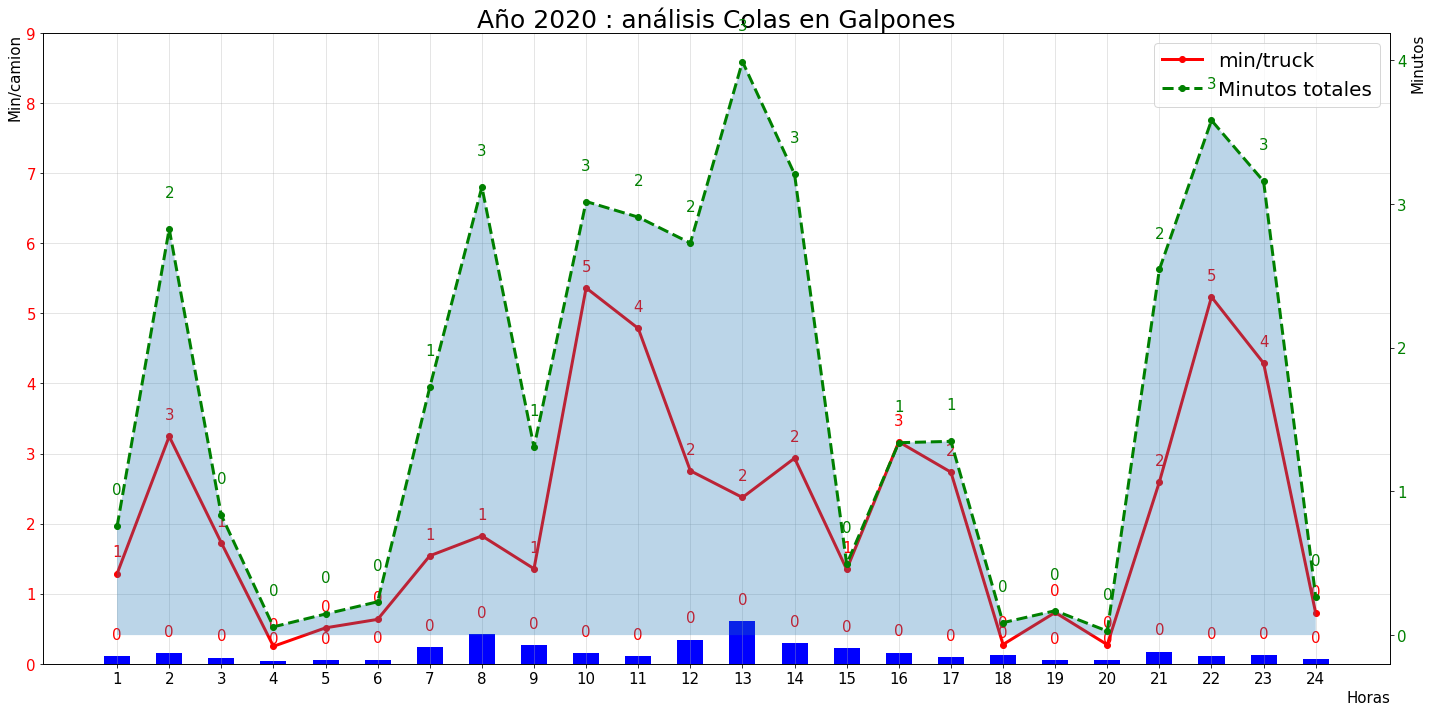

In [44]:
#creamos todos los plots necesarios para el promedio.
dias_mes = [[1,31],[32,60],[61,91],[92,121],[122,152],[153,160],[182,212],[213,243],[244,273],[274,304],[305,334],[335,365]]
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_2020 = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']
meses_2019 = ['Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_del_año = dict(zip(meses, dias_mes)) 
zonas_totales = ['C Secado L-3','C NPT3','C Prilado','Romana Mto','Romana Salitre','C ATM','Losa Envasado','Galpones','C NPT4',
         'C CS-11','Romana 3','C CS-12','C PTS','C Secado L-4','C CS-P.Valdivia','C CS-4','C NPT 1-2','C Granulacion']
romanas = ['Romana 3','Romana Mto','Romana Salitre']

for zona in ['Galpones']:
    df_zona = None
    count = 1
    for mes in meses_2020:
        print(zona,mes)
        #print(meses_del_año[mes][0],meses_del_año[mes][1])
        b_1 = stack_by_day_2(colas,zona,meses_del_año[mes][0],meses_del_año[mes][1],metric='mean')
        b_1['minutos'] = b_1['minutos/camion']*b_1['camiones']
#         title = mes + " : analisis Colas en cancha " + zona
#         file = "./colas_finales/" + mes + "/colas_minutos_" + mes + "_" + zona + ".png"
#         #plot_minutos_totales(b_1,title,file=None)
#         #clear_output(wait=True)
        #print(b_1)
        if count==1:
            df_zona =  b_1
            count+=1
        else:
            df_zona = df_zona + b_1
            count+=1
    df_zona = df_zona/(count-1)
    title = "Año 2020 : análisis Colas en " + zona
    file = "./minutos_colas_finales/2020/colas_minutos_2020_" + zona + "_v2.png"
    plot_minutos_totales(df_zona,title,file)
    clear_output(wait=True)

Romana Salitre Enero
Romana Salitre Febrero
Romana Salitre Marzo
Romana Salitre Abril
Romana Salitre Mayo
Romana Salitre Junio


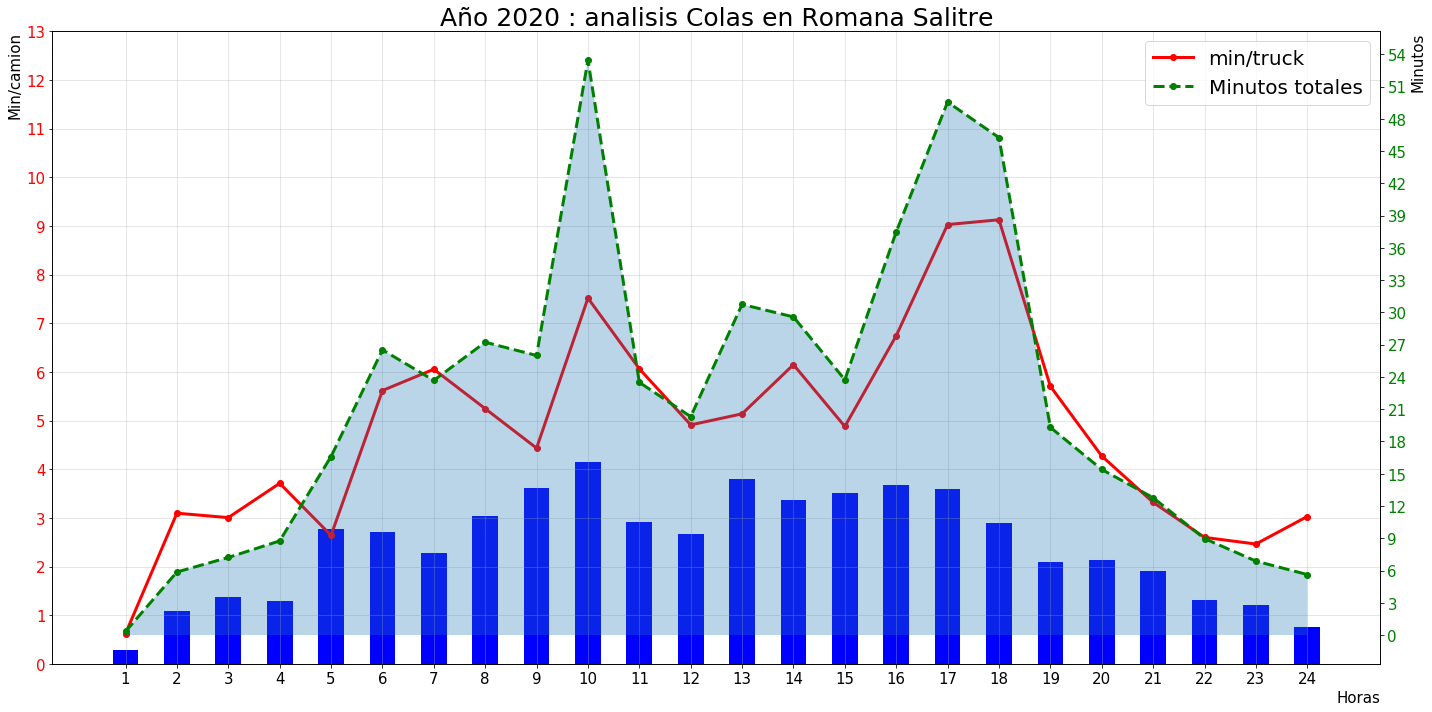

In [40]:
#creamos todos los plots necesarios para el promedio.
dias_mes = [[1,31],[32,60],[61,91],[92,121],[122,152],[153,160],[182,212],[213,243],[244,273],[274,304],[305,334],[335,365]]
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_2020 = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']
meses_2019 = ['Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
meses_del_año = dict(zip(meses, dias_mes)) 
zonas_totales = ['C Secado L-3','C NPT3','C Prilado','Romana Mto','Romana Salitre','C ATM','Losa Envasado','Galpones','C NPT4',
         'C CS-11','Romana 3','C CS-12','C PTS','C Secado L-4','C CS-P.Valdivia','C CS-4','C NPT 1-2','C Granulacion']
romanas = ['Romana 3','Romana Mto','Romana Salitre']

for zona in ['Romana 3']:
    df_zona = None
    count = 1
    for mes in meses_2020:
        print(zona,mes)
        #print(meses_del_año[mes][0],meses_del_año[mes][1])
        b_1 = stack_by_day_2(colas,zona,meses_del_año[mes][0],meses_del_año[mes][1],metric='mean')
        b_1['minutos'] = b_1['minutos/camion']*b_1['camiones']
#         title = mes + " : analisis Colas en cancha " + zona
#         file = "./colas_finales/" + mes + "/colas_minutos_" + mes + "_" + zona + ".png"
#         #plot_minutos_totales(b_1,title,file=None)
#         #clear_output(wait=True)
        #print(b_1)
        if count==1:
            df_zona =  b_1
            count+=1
        else:
            df_zona = df_zona + b_1
            count+=1
    df_zona = df_zona/(count-1)
    title = "Año 2020 : analisis Colas en " + zona
    file = "./minutos_colas_finales/2020/colas_minutos_2020_" + zona + "_v2.png"
    plot_minutos_totales(df_zona,title,file)
    clear_output(wait=True)

In [36]:
(actividad[(actividad['ZO']=='C NPT3') | (actividad['ZO']=='C CS-4')].shape[0]*250)/1000

15346.5

In [41]:
actividad.ZO.unique()

array(['C Secado L-4', 'Losa Envasado', 'C ATM', 'C NPT 1-2', 'Romana 3',
       'C Secado L-3', 'Salida', 'C PTS', 'C CS-4', 'C NPT3', 'C CS-11',
       'C Granulacion', 'Romana Mto', 'C CS-12', 'C CS-P.Valdivia',
       'C NPT4', 'Galpones', 'Romana Salitre', 'C Prilado'], dtype=object)

In [71]:
zonas = ['C Secado L-4', 'Losa Envasado', 'C ATM', 'C NPT 1-2', 'Romana 3',
       'C Secado L-3', 'C PTS', 'C CS-4', 'C NPT3', 'C CS-11',
       'C Granulacion', 'Romana Mto', 'C CS-12', 'C CS-P.Valdivia',
       'C NPT4', 'Galpones', 'Romana Salitre', 'C Prilado']
asd_1 = ['C NPT3' ,'Romana Salitre','Romana 3','C CS-4','C Secado L-4','C Prilado','C NPT4','Losa Envasado','C ATM','C PTS','C NPT 1-2','Galpones','Romana Mto','C Secado L-3','C Granulacion','C CS-11','C CS-P.Valdivia','C CS-12']
asd_2 = [45554, 27292, 22766, 15832, 13393,11832,8129, 5275, 3448, 3345, 2934, 2013, 1840, 809,434,145,135, 67] 
asd_sin_romana = ['C NPT3','C CS-4','C Secado L-4','C Prilado','C NPT4','Losa Envasado','C ATM','C PTS','C NPT 1-2','Galpones','C Secado L-3','C Granulacion','C CS-11','C CS-P.Valdivia','C CS-12']
asd_2_sin_romana = [45554, 15832, 13393,11832,8129, 5275, 3448, 3345, 2934, 2013, 809,434,145,135, 67]
aux_romana = ['Romana Salitre','Romana 3','Romana Mto']
aux_2_romana = [27292, 22766,1840]

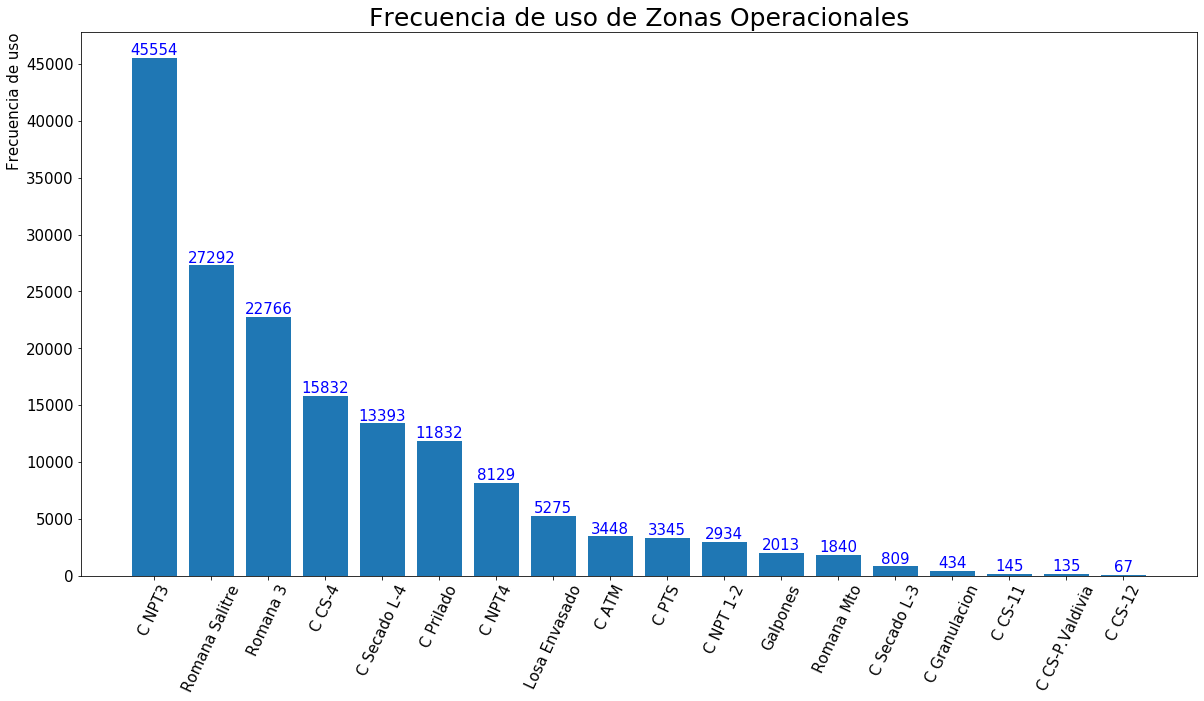

In [80]:
aux_ = actividad[actividad['ZO']!='Salida']
plt.figure(figsize=(20,10))
plt.bar(asd_1,asd_2)
plt.xticks(asd_1,rotation=65,fontsize=15)
plt.yticks(np.arange(0,50000,5000),fontsize=15)
plt.ylabel("Frecuencia de uso",fontsize=15,position=(1,1),ha='right')
plt.title("Frecuencia de uso de Zonas Operacionales",fontsize=25)
for index, value in enumerate(asd_2):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.savefig('usos_zonas_operacionales.png')
plt.show()

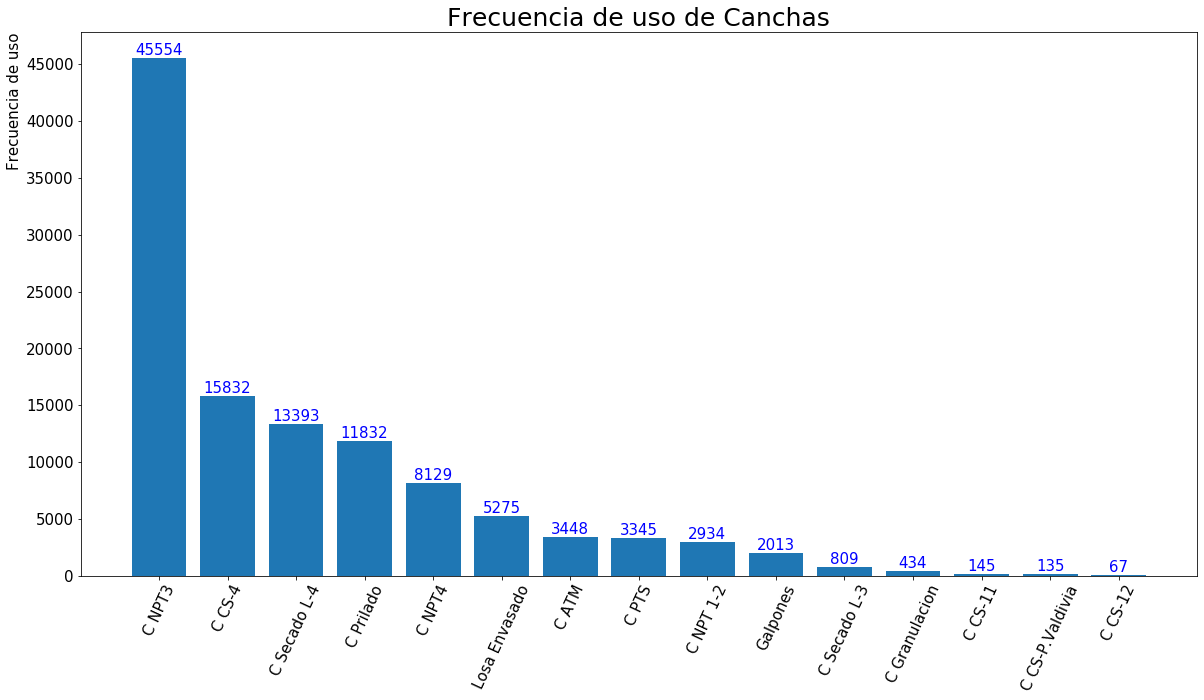

In [79]:
aux_ = actividad[actividad['ZO']!='Salida']
plt.figure(figsize=(20,10))
plt.bar(asd_sin_romana,asd_2_sin_romana)
plt.xticks(asd_sin_romana,rotation=65,fontsize=15)
plt.yticks(np.arange(0,50000,5000),fontsize=15)
plt.ylabel("Frecuencia de uso",fontsize=15,position=(1,1),ha='right')
plt.title("Frecuencia de uso de Canchas",fontsize=25)
for index, value in enumerate(asd_2_sin_romana):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.savefig('usos_zonas_operacionales_sin_romana.png')
plt.show()

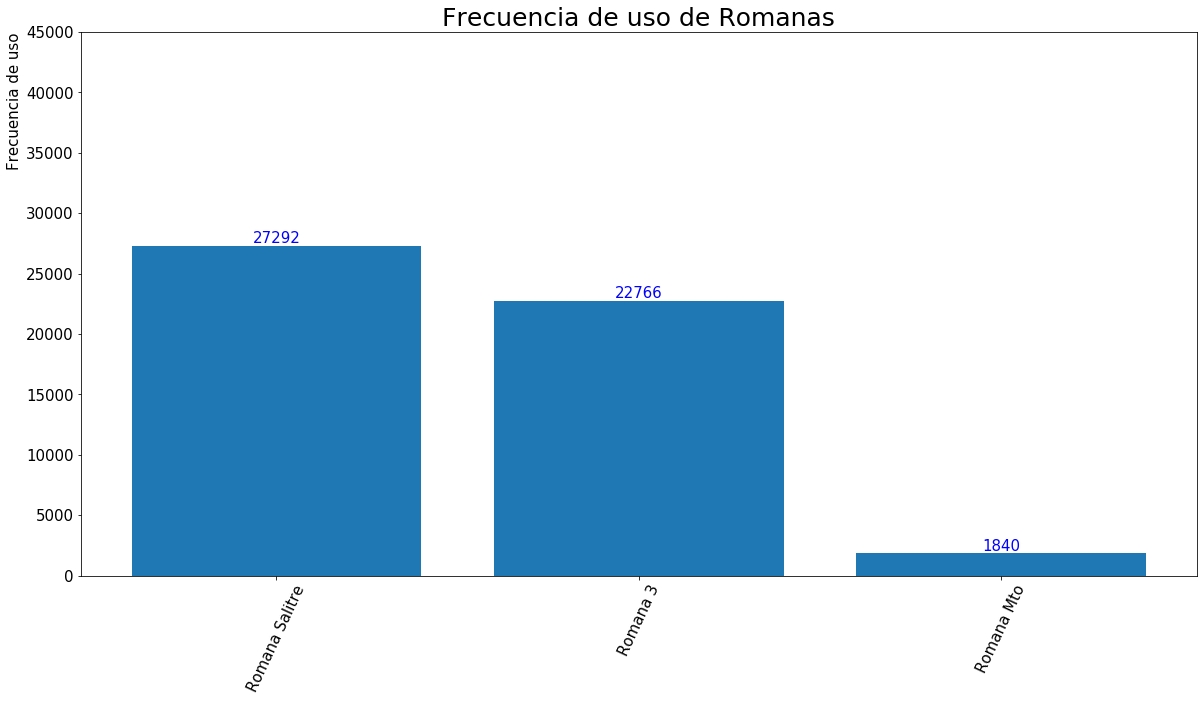

In [78]:
aux_ = actividad[actividad['ZO']!='Salida']
plt.figure(figsize=(20,10))
plt.bar(aux_romana,aux_2_romana)
plt.xticks(aux_romana,rotation=65,fontsize=15)
plt.yticks(np.arange(0,50000,5000),fontsize=15)
plt.ylabel("Frecuencia de uso",fontsize=15,position=(1,1),ha='right')
plt.title("Frecuencia de uso de Romanas",fontsize=25)
for index, value in enumerate(aux_2_romana):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
plt.savefig('usos_de_romanas.png')
plt.show()